# Data distributions

## What does your data look like? (I)
Up until now you have focused on creating new features and dealing with issues in your data. Feature engineering can also be used to make the most out of the data that you already have and use it more effectively when creating machine learning models.
Many algorithms may assume that your data is normally distributed, or at least that all your columns are on the same scale. This will often not be the case, e.g. one feature may be measured in thousands of dollars while another would be number of years. In this exercise, you will create plots to examine the distributions of some numeric columns in the so_survey_df DataFrame, stored in so_numeric_df.

### init: 2 dataframes

In [2]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(so_survey_df, so_numeric_df)
tobedownloaded="{pandas.core.frame.DataFrame: {'so_numeric_df.csv': 'https://file.io/XIGqyI',\
  'so_survey_df.csv': 'https://file.io/Vr3jV8'}}"
prefix='data_from_datacamp/Chap3-Exercise1.1_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")


In [3]:
import pandas as pd
so_survey_df=pd.read_csv(prefix+'so_survey_df.csv',index_col=0)
so_numeric_df=pd.read_csv(prefix+'so_numeric_df.csv',index_col=0)

In [6]:
import matplotlib.pyplot as plt

### code

Generate a histogram of all columns in the so_numeric_df DataFrame.



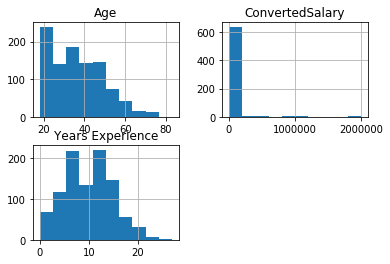

In [7]:
# Create a histogram
so_numeric_df.hist()
plt.show()

Generate box plots of the Age and Years Experience columns in the so_numeric_df DataFrame.



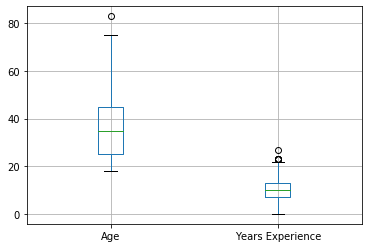

In [8]:
# Create a boxplot of two columns
so_numeric_df[['Age', 'Years Experience']].boxplot()
plt.show()

Generate a box plot of the ConvertedSalary column in the so_numeric_df DataFrame.



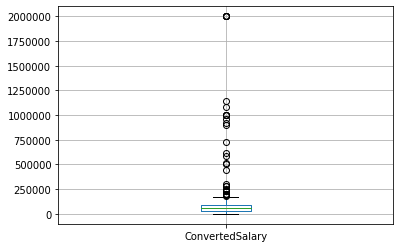

In [9]:
# Create a boxplot of ConvertedSalary
so_numeric_df[['ConvertedSalary']].boxplot()
plt.show()

## What does your data look like? (II)
In the previous exercise you looked at the distribution of individual columns. While this is a good start, a more detailed view of how different features interact with each other may be useful as this can impact your decision on what to transform and how.

### code

- Import matplotlib's pyplot module as plt.
- Import seaborn as sns.
- Plot pairwise relationships in the so_numeric_df dataset.
- Show the plot.

C:\Users\F279814\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\F279814\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


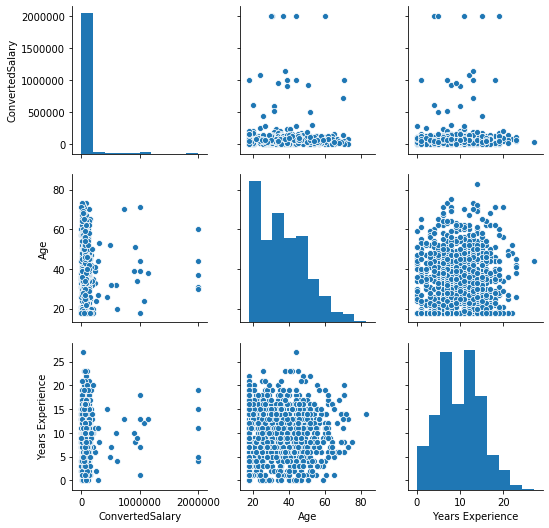

In [12]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Plot pairwise relationships
sns.pairplot(so_numeric_df)

# Show plot
plt.show()

In [13]:
# Print summary statistics
print(so_numeric_df.describe())

       ConvertedSalary         Age  Years Experience
count     6.650000e+02  999.000000        999.000000
mean      9.256517e+04   36.003003          9.961962
std       2.091344e+05   13.255127          4.878129
min       0.000000e+00   18.000000          0.000000
25%       2.755000e+04   25.000000          7.000000
50%       5.556200e+04   35.000000         10.000000
75%       8.823800e+04   45.000000         13.000000
max       2.000000e+06   83.000000         27.000000


# Scaling and transformations


## Normalization
As discussed in the video, in normalization you linearly scale the entire column between 0 and 1, with 0 corresponding with the lowest value in the column, and 1 with the largest.
When using scikit-learn (the most commonly used machine learning library in Python) you can use a MinMaxScaler to apply normalization. (It is called this as it scales your values between a minimum and maximum value.)

### code

In [14]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
MM_scaler = MinMaxScaler()

# Fit MM_scaler to the data
MM_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_MM'] = MM_scaler.transform(so_numeric_df[['Age']])

# Compare the origional and transformed column
print(so_numeric_df[['Age_MM', 'Age']].head())

     Age_MM  Age
0  0.046154   21
1  0.307692   38
2  0.415385   45
3  0.430769   46
4  0.323077   39


## Standardization
While normalization can be useful for scaling a column between two data points, it is hard to compare two scaled columns if even one of them is overly affected by outliers. One commonly used solution to this is called standardization, where instead of having a strict upper and lower bound, you center the data around its mean, and calculate the number of standard deviations away from mean each data point is.

### code

In [15]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
SS_scaler = StandardScaler()

# Fit SS_scaler to the data
SS_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_SS'] = SS_scaler.transform(so_numeric_df[['Age']])

# Compare the origional and transformed column
print(so_numeric_df[['Age_SS', 'Age']].head())

     Age_SS  Age
0 -1.132431   21
1  0.150734   38
2  0.679096   45
3  0.754576   46
4  0.226214   39


## Log transformation
In the previous exercises you scaled the data linearly, which will not affect the data's shape. This works great if your data is normally distributed (or closely normally distributed), an assumption that a lot of machine learning models make. Sometimes you will work with data that closely conforms to normality, e.g the height or weight of a population. On the other hand, many variables in the real world do not follow this pattern e.g, wages or age of a population. In this exercise you will use a log transform on the ConvertedSalary column as it has a large amount of its data centered around the lower values, but contains very high values also. These distributions are said to have a long right tail.

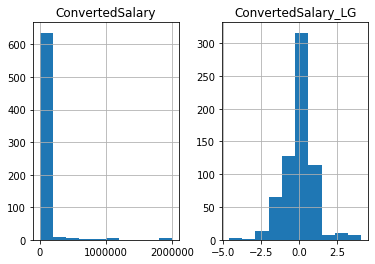

In [18]:
# Import PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
pow_trans.fit(so_numeric_df[['ConvertedSalary']])

# Apply the power transform to the data
so_numeric_df['ConvertedSalary_LG'] = pow_trans.transform(so_numeric_df[['ConvertedSalary']])

# Plot the data before and after the transformation
so_numeric_df[['ConvertedSalary', 'ConvertedSalary_LG']].hist()
plt.show()

# Removing outliers


## Percentage based outlier removal
One way to ensure a small portion of data is not having an overly adverse effect is by removing a certain percentage of the largest and/or smallest values in the column. This can be achieved by finding the relevant quantile and trimming the data using it with a mask. This approach is particularly useful if you are concerned that the highest values in your dataset should be avoided. When using this approach, you must remember that even if there are no outliers, this will still remove the same top N percentage from the dataset.

### code

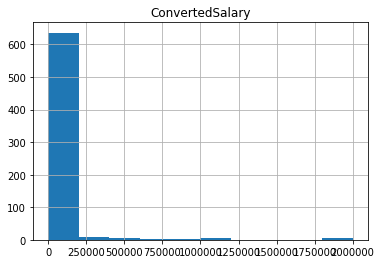

<Figure size 432x288 with 0 Axes>

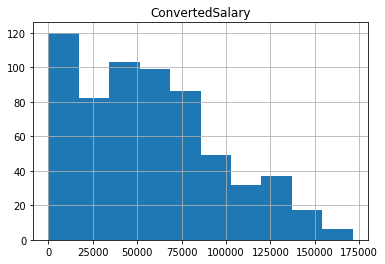

In [20]:
# Find the 95th quantile
quantile = so_numeric_df['ConvertedSalary'].quantile(0.95)

# Trim the outliers
trimmed_df = so_numeric_df[so_numeric_df['ConvertedSalary'] < quantile]

# The original histogram
so_numeric_df[['ConvertedSalary']].hist()
plt.show()
plt.clf()

# The trimmed histogram
trimmed_df[['ConvertedSalary']].hist()
plt.show()

## Statistical outlier removal
While removing the top N% of your data is useful for ensuring that very spurious points are removed, it does have the disadvantage of always removing the same proportion of points, even if the data is correct. A commonly used alternative approach is to remove data that sits further than three standard deviations from the mean. You can implement this by first calculating the mean and standard deviation of the relevant column to find upper and lower bounds, and applying these bounds as a mask to the DataFrame. This method ensures that only data that is genuinely different from the rest is removed, and will remove fewer points if the data is close together.

### code

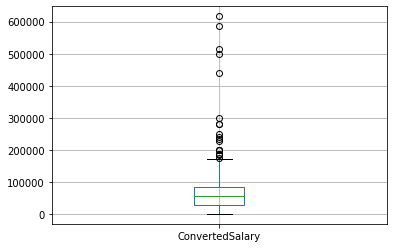

In [23]:
# Find the mean and standard dev
std = so_numeric_df['ConvertedSalary'].std()
mean = so_numeric_df['ConvertedSalary'].mean()

# Calculate the cutoff
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off

# Trim the outliers
trimmed_df = so_numeric_df[(so_numeric_df['ConvertedSalary'] < upper) \
                           & (so_numeric_df['ConvertedSalary'] > lower)]

# The trimmed box plot
trimmed_df[['ConvertedSalary']].boxplot()
plt.show()

# Scaling and transforming new data


## Train and testing transformations (I)
So far you have created scalers based on a column, and then applied the scaler to the same data that it was trained on. When creating machine learning models you will generally build your models on historic data (train set) and apply your model to new unseen data (test set). In these cases you will need to ensure that the same scaling is being applied to both the training and test data.
To do this in practice you train the scaler on the train set, and keep the trained scaler to apply it to the test set. You should never retrain a scaler on the test set.

For this exercise and the next, we split the so_numeric_df DataFrame into train (so_train_numeric) and test (so_test_numeric) sets.

### init: 2 dataframes

In [24]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(so_train_numeric,so_test_numeric)
tobedownloaded="{pandas.core.frame.DataFrame: {'so_test_numeric.csv': 'https://file.io/AEo5Yo',\
  'so_train_numeric.csv': 'https://file.io/R0GFqR'}}"
prefix='data_from_datacamp/Chap3-Exercise4.1_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")


{pandas.core.frame.DataFrame: {"so_test_numeric.csv": "https://file.io/AEo5Yo",  "so_train_numeric.csv": "https://file.io/R0GFqR"}}
{'pandas.core.frame.DataFrame': {'so_test_numeric.csv': 'https://file.io/AEo5Yo', 'so_train_numeric.csv': 'https://file.io/R0GFqR'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  4506    0  4506    0     0   2433      0 --:--:--  0:00:01 --:--:--  2433
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0  

In [25]:
import pandas as pd
so_train_numeric=pd.read_csv(prefix+'so_train_numeric.csv',index_col=0)
so_test_numeric=pd.read_csv(prefix+'so_test_numeric.csv',index_col=0)

### code

In [29]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Apply a standard scaler to the data
SS_scaler = StandardScaler()

# Fit the standard scaler to the data
SS_scaler.fit(so_train_numeric[['Age']])

# Transform the test data using the fitted scaler
so_test_numeric['Age_ss'] = SS_scaler.transform(so_test_numeric[['Age']])
print(so_test_numeric[['Age', 'Age_ss']].head())

     Age    Age_ss
700   35 -0.069265
701   18 -1.343218
702   47  0.829997
703   57  1.579381
704   41  0.380366


## Train and testing transformations (II)
Similar to applying the same scaler to both your training and test sets, if you have removed outliers from the train set, you probably want to do the same on the test set as well. Once again you should ensure that you use the thresholds calculated only from the train set to remove outliers from the test set.

Similar to the last exercise, we split the so_numeric_df DataFrame into train (so_train_numeric) and test (so_test_numeric) sets.

### code

In [30]:
train_std = so_train_numeric['ConvertedSalary'].std()
train_mean = so_train_numeric['ConvertedSalary'].mean()

cut_off = train_std * 3
train_lower, train_upper = train_mean - cut_off, train_mean + cut_off

# Trim the test DataFrame
trimmed_df = so_test_numeric[(so_test_numeric['ConvertedSalary'] < train_upper) \
                             & (so_test_numeric['ConvertedSalary'] > train_lower)]